In [1]:
import shutil
import requests
from pycelonis import get_celonis
from pycelonis.pql import PQL, PQLColumn, OrderByColumn
import os
from dotenv import load_dotenv
import pandas as pd 
from pathlib import Path


load_dotenv()

BASE_URL = os.getenv('BASE_URL') or ''
APP_TOKEN = os.getenv('APP_TOKEN') or ''
BUCKET_ID = os.getenv('BUCKET_ID') or ''

TIMEOUT = 20
HEADER = {'Authorization': "AppKey " + APP_TOKEN}
INPUT_FOLDER = "./data/inputs/celonis/"
dirpath = Path(INPUT_FOLDER)
if dirpath.exists() and dirpath.is_dir():
    shutil.rmtree(dirpath)
os.makedirs(INPUT_FOLDER, exist_ok=True)
OUTPUT_FOLDER = "./data/output/celonis"
dirpath = Path(OUTPUT_FOLDER)
if dirpath.exists() and dirpath.is_dir():
    shutil.rmtree(dirpath)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
DATA_POOL_ID = os.getenv('DATA_POOL_ID') or ''
DATA_MODEL_ID = os.getenv('DATA_MODEL_ID') or ''

celonis = get_celonis(base_url=BASE_URL, api_token=APP_TOKEN, key_type='APP_KEY')

data_pool = celonis.data_integration.get_data_pool(DATA_POOL_ID)
data_model = data_pool.get_data_model(DATA_MODEL_ID)
print(data_model.name)

query = PQL(distinct=False, limit=None, offset=None)
query += PQLColumn(name="CaseId", query=""" "TM_Labeled_Data"."CaseId" """)
query += PQLColumn(name="TimestampLocal", query=""" "TM_Labeled_Data"."TimestampLocal" """)
query += OrderByColumn(query=""" "TM_Labeled_Data"."TimestampLocal" """, ascending=False)
query += PQLColumn(name="EventDescription", query=""" "TM_Labeled_Data"."EventDescription" """)
query += PQLColumn(name="ProcessName", query=""" "TM_Labeled_Data"."ProcessName" """)
query += PQLColumn(name="EventType", query=""" "TM_Labeled_Data"."EventType" """)
query += PQLColumn(name="ClipboardContent", query=""" "TM_Labeled_Data"."ClipboardContent" """)
query += PQLColumn(name="ActiveWindow", query=""" "TM_Labeled_Data"."ActiveWindow" """)
query += PQLColumn(name="MousePositionX", query=""" "TM_Labeled_Data"."MousePositionX" """)
query += PQLColumn(name="MousePositionY", query=""" "TM_Labeled_Data"."MousePositionY" """)
query += PQLColumn(name="ScreenshotId", query=""" "TM_Labeled_Data"."ScreenshotId" """)
query += PQLColumn(name="UserId", query=""" "TM_Labeled_Data"."UserId" """)


result_df = data_model.export_data_frame(query)
result_df = result_df[result_df["CaseId"] == "2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78"]
# result_df = result_df[result_df["CaseId"] == "2023-08-12858e14d1-1026-403a-a519-90d3df2cf616"]
# result_df = result_df[result_df["CaseId"] == "2023-06-182e756d3e-1a0e-4a22-bd18-893f1369af79"]
# result_df["TimestampLocal"] = pd.to_datetime(result_df["TimestampLocal"])
result_df = result_df.sort_values(by='TimestampLocal', ascending=True)
result_df = result_df[result_df["ScreenshotId"] != ""]
result_df = result_df.dropna(subset=['MousePositionX'])
# result_df = result_df[13:16]
result_df = result_df.tail(4)
result_df = result_df.sort_values(by='TimestampLocal', ascending=True)
result_df = result_df.reset_index(drop=True)
result_df

/home/sovin/.local/share/virtualenvs/ActivityGen-VZ3EqeHP/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Your PyCelonis Version 2.2.0 is outdated (Newest Version: 2.4.0). Please upgrade the package via: pip install --extra-index-url=https://pypi.celonis.cloud/ pycelonis pycelonis_core --upgrade


Quickstart Task Mining Data Model - Task Mining - Todo Demo


1it [00:00, 14.22it/s, Status: DONE]


,CaseId,TimestampLocal,EventDescription,ProcessName,EventType,ClipboardContent,ActiveWindow,MousePositionX,MousePositionY,ScreenshotId,UserId
0,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:55.131,In brave Left click Todo App,brave,Left click,,Todo App - Brave,1130.0,352.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
1,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:56.980,In brave Left click Submit,brave,Left click,,Todo App - Brave,1503.0,339.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
2,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:58.675,In brave Left click,brave,Left click,,Todo App - Brave,810.0,498.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
3,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:34:01.441,In brave Left click Delete,brave,Left click,,Todo App - Brave,1453.0,509.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs


In [2]:
for index, row in result_df.iterrows():
    SCREENSHOT_ID = row["ScreenshotId"]
    USER_ID = row["UserId"]
    if not SCREENSHOT_ID == "":
        URL_FIRST_PART =f"{BASE_URL}/image-collector/api/v3/resources/{USER_ID}/"
        URL_SECOND_PART =f"?bucketId={BUCKET_ID}"
        URL = URL_FIRST_PART + SCREENSHOT_ID + URL_SECOND_PART

        response = requests.get(URL, headers=HEADER, timeout=TIMEOUT, stream=True)
        print(SCREENSHOT_ID + ": " + str(response))
        with open(INPUT_FOLDER + SCREENSHOT_ID, 'wb+') as out_file:
            shutil.copyfileobj(response.raw, out_file)

IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.png: <Response [200]>
IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000016.png: <Response [200]>
IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000017.png: <Response [200]>
IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000018.png: <Response [200]>


In [3]:
result_df

,CaseId,TimestampLocal,EventDescription,ProcessName,EventType,ClipboardContent,ActiveWindow,MousePositionX,MousePositionY,ScreenshotId,UserId
0,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:55.131,In brave Left click Todo App,brave,Left click,,Todo App - Brave,1130.0,352.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
1,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:56.980,In brave Left click Submit,brave,Left click,,Todo App - Brave,1503.0,339.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
2,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:58.675,In brave Left click,brave,Left click,,Todo App - Brave,810.0,498.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
3,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:34:01.441,In brave Left click Delete,brave,Left click,,Todo App - Brave,1453.0,509.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs


In [4]:
from run_batch import run_batch_inference
app_name = "Todo App"
full_jsons = run_batch_inference(INPUT_FOLDER+"*", app_name, OUTPUT_FOLDER)

[Batch inference started]
./data/inputs/celonis/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.png
[Text Detection Completed in 0.247 s] Input: ./data/inputs/celonis/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.png Output: ./data/output/celonis/ocr/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.json
[Compo Detection Completed in 1.634 s] Input: ./data/inputs/celonis/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.png Output: ./data/output/celonis/compo/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.json
[Template Detection Completed in 0.124 s] Input: ./data/inputs/celonis/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.png Output: ./data/output/celonis/template_matcher/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.json
[Classification Started]
[Merge Completed] Input: ./data/inputs/celonis/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.png Output: ./data/output/celonis/merge/IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000014.jpg
[Activity Name Generati

In [5]:
def find_smallest_bbox(entries, mousepos_x, mousepos_y):
    smallest_entry = None
    smallest_area = float('inf')

    for entry in entries:
        x1, y1, x2, y2 = entry["bbox"]['x1'], entry["bbox"]['y1'], entry["bbox"]['x2'], entry["bbox"]['y2']

        # Calculate the area of the current bounding box
        area = (x2 - x1) * (y2 - y1)

        if x1 <= mousepos_x <= x2 and y1 <= mousepos_y <= y2:
            # The mouse position is within the current bounding box
            if area < smallest_area:
                smallest_area = area
                smallest_entry = entry

    return smallest_entry

In [6]:
new_event_log = result_df.copy()
new_event_log

,CaseId,TimestampLocal,EventDescription,ProcessName,EventType,ClipboardContent,ActiveWindow,MousePositionX,MousePositionY,ScreenshotId,UserId
0,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:55.131,In brave Left click Todo App,brave,Left click,,Todo App - Brave,1130.0,352.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
1,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:56.980,In brave Left click Submit,brave,Left click,,Todo App - Brave,1503.0,339.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
2,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:58.675,In brave Left click,brave,Left click,,Todo App - Brave,810.0,498.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs
3,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:34:01.441,In brave Left click Delete,brave,Left click,,Todo App - Brave,1453.0,509.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs


In [7]:
import cv2
import matplotlib.pyplot as plt
import glob

img_paths = glob.glob(INPUT_FOLDER+"*")

# previous_screenshot_id = None#  # To store the screenshot ID from the previous row

# Start iterating from the second row
for index, row in result_df.iloc[1:].iterrows():
    print(index)
    print(row["ScreenshotId"])
    full_json = full_jsons[index-1]
    # result_df.loc[index,'enabled_activities'] = ";".join(full_json["activity_names"])
    img_resize_shape = full_json["img_resize_shape"]  # type: ignore
    # print(img_resize_shape)
    activity_names = full_json["activity_names"]  # type: ignore
    
    # Use the previous screenshot ID if available, otherwise use the current row's screenshot ID
    screenshot_id = result_df.loc[index - 1, "ScreenshotId"]
    
    img = cv2.imread(INPUT_FOLDER + "/" + screenshot_id)
    img_shape = img.shape

    resize_factor = img_resize_shape[0] / img_shape[0]

    img = cv2.resize(img, (int(img_resize_shape[1]), int(img_resize_shape[0])))

    mousepos_x = int(row['MousePositionX'] * resize_factor)
    mousepos_y = int(row['MousePositionY'] * resize_factor)

    img = cv2.circle(img, (mousepos_x, mousepos_y), radius=7, color=(0, 0, 255), thickness=10)
    # cv2.imshow(str(row['TimestampLocal']), img)
    # cv2.waitKey(0)
    smallest_entry = find_smallest_bbox(activity_names, mousepos_x, mousepos_y)
    if not smallest_entry["activity_name"]:
        smallest_entry["activity_name"] = "df"
    print(smallest_entry["activity_name"])
    cv2.imwrite(str(index) + "_" + screenshot_id + "_"+ smallest_entry["activity_name"] + ".jpg", img)

    activity_names_set = set()
    for activity in full_json["activity_names"]:
        activity_names_set.add(activity["activity_name"])
    new_event_log.loc[index, 'Enabled Activities'] = "; ".join(activity_names_set)
    new_event_log.loc[index, 'Activity'] = smallest_entry["activity_name"]

1
IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000016.png
Submit task
2
IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000017.png
Mark task as complete
3
IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_000000018.png
Delete task


In [8]:
# import cv2
# import matplotlib.pyplot as plt
# import glob

# img_paths = glob.glob(INPUT_FOLDER+"*")

# # previous_screenshot_id = None#  # To store the screenshot ID from the previous row

# # Start iterating from the second row
# for index, row in result_df.iloc[1:].iterrows():
#     print(index)
#     print(row["ScreenshotId"])
#     full_json = full_jsons[index-1]
#     # result_df.loc[index,'enabled_activities'] = ";".join(full_json["activity_names"])
#     img_resize_shape = full_json["img_resize_shape"]  # type: ignore
#     # print(img_resize_shape)
#     activity_names = full_json["activity_names"]  # type: ignore

#     # Sort entries based on x1 and y1 positions
#     activity_names = sorted(activity_names, key=lambda entry: (entry["bbox"]["x1"], entry["bbox"]["y1"]))

#     # Assign unique IDs based on activity_name
#     activity_name_counts = {}
#     for entry in activity_names:
#         activity_name = entry["activity_name"]
#         if activity_name in activity_name_counts:
#             activity_name_counts[activity_name] += 1
#         else:
#             activity_name_counts[activity_name] = 1
#         entry["activity_name_id"] = activity_name_counts[activity_name] - 1
        
#     # Use the previous screenshot ID if available, otherwise use the current row's screenshot ID
#     screenshot_id = result_df.loc[index - 1, "ScreenshotId"]
    
#     img = cv2.imread(INPUT_FOLDER + "/" + screenshot_id)
#     img_shape = img.shape

#     resize_factor = img_resize_shape[0] / img_shape[0]

#     img = cv2.resize(img, (int(img_resize_shape[1]), int(img_resize_shape[0])))

#     mousepos_x = int(row['MousePositionX'] * resize_factor)
#     mousepos_y = int(row['MousePositionY'] * resize_factor)

#     img = cv2.circle(img, (mousepos_x, mousepos_y), radius=7, color=(0, 0, 255), thickness=10)
#     # cv2.imshow(str(row['TimestampLocal']), img)
#     # cv2.waitKey(0)
#     smallest_entry = find_smallest_bbox(activity_names, mousepos_x, mousepos_y)
#     # if not smallest_entry["activity_name"]:
#     #     smallest_entry["activity_name"] = "df"
#     print(smallest_entry)
#     cv2.imwrite(str(index) + "_" + screenshot_id + "_"+ smallest_entry["activity_name"] + ".jpg", img)

#     activity_names_set = set()
#     for activity in full_json["activity_names"]:
#         activity_names_set.add(activity["activity_name"] + " " + str(activity["activity_name_id"]))
#     activity_names_set = sorted(activity_names_set)
#     new_event_log.loc[index, 'Enabled Activities'] = "; ".join(activity_names_set)
#     new_event_log.loc[index, 'Activity'] = smallest_entry["activity_name"] + " " + str(smallest_entry["activity_name_id"])

In [9]:
new_event_log

,CaseId,TimestampLocal,EventDescription,ProcessName,EventType,ClipboardContent,ActiveWindow,MousePositionX,MousePositionY,ScreenshotId,UserId,Enabled Activities,Activity
0,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:55.131,In brave Left click Todo App,brave,Left click,,Todo App - Brave,1130.0,352.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs,NaN,NaN
1,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:56.980,In brave Left click Submit,brave,Left click,,Todo App - Brave,1503.0,339.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs,Delete task; Submit task; Add new task; Mark t...,Submit task
2,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:58.675,In brave Left click,brave,Left click,,Todo App - Brave,810.0,498.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs,Delete task; Submit task; Add new task; Mark t...,Mark task as complete
3,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:34:01.441,In brave Left click Delete,brave,Left click,,Todo App - Brave,1453.0,509.0,IMG_6cb666bc-245c-40c9-9d06-4d448ab71c78_00000...,cqzh6dnI1g5xvIUoOOGIoBsOTkQUFUolyukATvkARvs,Add task to todo; Submit task; Add new task; M...,Delete task


In [10]:
new_event_log = new_event_log.drop('EventDescription', axis=1)
new_event_log = new_event_log.drop('ClipboardContent', axis=1)
new_event_log = new_event_log.drop('ProcessName', axis=1)
new_event_log = new_event_log.drop('MousePositionX', axis=1)
new_event_log = new_event_log.drop('MousePositionY', axis=1)
new_event_log = new_event_log.drop('ScreenshotId', axis=1)
new_event_log = new_event_log.drop('UserId', axis=1)
new_event_log = new_event_log[1:]
new_event_log

,CaseId,TimestampLocal,EventType,ActiveWindow,Enabled Activities,Activity
1,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:56.980,Left click,Todo App - Brave,Delete task; Submit task; Add new task; Mark t...,Submit task
2,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:33:58.675,Left click,Todo App - Brave,Delete task; Submit task; Add new task; Mark t...,Mark task as complete
3,2023-08-126cb666bc-245c-40c9-9d06-4d448ab71c78,2023-08-12 12:34:01.441,Left click,Todo App - Brave,Add task to todo; Submit task; Add new task; M...,Delete task


In [11]:
new_event_log.to_csv("translucent_event_log.csv", index=False)

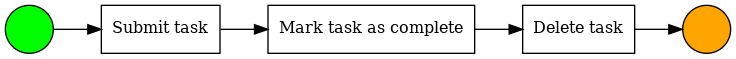

In [12]:
import pm4py

# log = pm4py.read_('<path-to-xes-log-file.xes>')
dataframe = pm4py.format_dataframe(new_event_log, case_id='CaseId', activity_key='Activity', timestamp_key='TimestampLocal')
event_log = pm4py.convert_to_event_log(dataframe)
process_model = pm4py.discover_bpmn_inductive(event_log)
pm4py.view_bpmn(process_model)